<a href="https://colab.research.google.com/github/marisaraj14/Face-Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Recognition Using face_recognition library

In [1]:
# Installing the library
! pip install face_recognition

     |████████████████████████████████| 100.1 MB 8.5 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=47259310453c2497138b31486c9671fa5dbc8015476778ee43d94de2ca727d54
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Adding Known Images

In [ ]:
! mkdir known
! wget https://static.dezeen.com/uploads/2021/06/elon-musk-architect_dezeen_1704_col_0.jpg -O known/Elon.jpg
! wget https://the360report.com/wp-content/uploads/2020/09/Muk.jpg -O known/Ambani.jpg
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/A._P._J._Abdul_Kalam.jpg/1200px-A._P._J._Abdul_Kalam.jpg -O known/Kalam.jpg

Adding Unknown Images

In [37]:
! mkdir unknown
! wget https://static.dezeen.com/uploads/2021/06/elon-musk-architect_dezeen_1704_col_0.jpg -O unknown/1.jpg
! wget https://the360report.com/wp-content/uploads/2020/09/Muk.jpg -O unknown/4.jpg
! wget https://static01.nyt.com/images/2015/07/28/world/28KALAM-OBIT/28KALAM-OBIT-superJumbo.jpg -O unknown/3.jpg
! wget https://i.pinimg.com/originals/0c/3c/3c/0c3c3cd04da24d5f7be29dfd4a121c73.jpg -O unknown/2.jpg


--2021-07-21 11:20:59--  https://static.dezeen.com/uploads/2021/06/elon-musk-architect_dezeen_1704_col_0.jpg
Resolving static.dezeen.com (static.dezeen.com)... 104.22.46.232, 172.67.28.10, 104.22.47.232, ...
Connecting to static.dezeen.com (static.dezeen.com)|104.22.46.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg           [ <=>                ] 110.25K  --.-KB/s    in 0.003s  

2021-07-21 11:20:59 (41.8 MB/s) - ‘unknown/1.jpg’ saved [112896]

--2021-07-21 11:20:59--  https://the360report.com/wp-content/uploads/2020/09/Muk.jpg
Resolving the360report.com (the360report.com)... 178.18.251.203
Connecting to the360report.com (the360report.com)|178.18.251.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17372 (17K) [image/jpeg]
Saving to: ‘unknown/4.jpg’

unknown/4.jpg       100%[===================>]  16.96K  --.-KB/s    in 0.09s   

2021-07-21 11:21:00 (180 KB/s)

Importing the Libraries

In [5]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

Resizing the Images

In [6]:
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height))

Generate Encodings for Known & Unknown Images & Printing Results

Processing 1.jpg
Processing 2.jpg
Processing 4.jpg
Processing 3.jpg


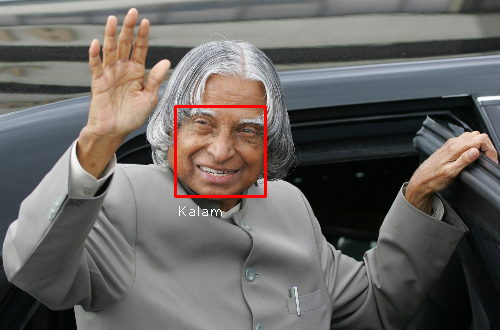

[True, False, False]


In [38]:
# Generate Encodings for Known Images
# stores encodings for known images
known_encodings = []
# stores file name of knwon images
known_names = []
#stores known directories
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

# Generate Encodings for Unknown Images
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print("Processing", file)
  img = read_img(unknown_dir + '/' + file)
  # Only taking first image(0) because single person 
  img_enc = face_recognition.face_encodings(img)[0]

# Comparing known and Unknown Images
results = face_recognition.compare_faces(known_encodings, img_enc)

#print(face_recognition.face_distance(known_encodings, img_enc))


for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)

print(results)